In [1]:
# Importation statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data importation
file = "final_server_logs.csv"
data = pd.read_csv(file)

In [8]:
data.head()

,Timestamp,IP Address,Session ID,Country,Method,URL,Status Code,Response Time (ms),Sales Agent,Referrer,Product,Price,IP_Session
0,2024-09-14 02:42:18,160.72.56.62,919acb5e-adc8-44ab-94ce-a3007eff7605,UK,GET,/faq.html,302,188.81,NaN,NaN,NaN,NaN,160.72.56.62_919acb5e-adc8-44ab-94ce-a3007eff7605
1,2024-11-21 18:19:32,193.172.144.75,8679f08d-bdf7-454f-b46f-0aaa44357fd2,USA,GET,/index.html,404,331.89,NaN,NaN,NaN,NaN,193.172.144.75_8679f08d-bdf7-454f-b46f-0aaa443...
2,2025-02-11 20:24:05,52.127.37.141,83191834-e6b1-424a-bdb1-87c4d0d3a544,France,POST,/product/performance-analytics-tool/feedback.php,200,241.91,NaN,NaN,NaN,NaN,52.127.37.141_83191834-e6b1-424a-bdb1-87c4d0d3...
3,2024-09-06 18:06:15,102.60.51.186,66be487c-adac-4898-9b48-0a04704c2814,USA,GET,/images/events.jpg,200,247.48,NaN,NaN,NaN,NaN,102.60.51.186_66be487c-adac-4898-9b48-0a04704c...
4,2025-02-18 16:10:38,160.162.202.127,ba1653d0-04e0-41d8-9403-f34fe56eb7e9,UK,GET,/images/events.jpg,999,257.20,NaN,NaN,NaN,NaN,160.162.202.127_ba1653d0-04e0-41d8-9403-f34fe5...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           500000 non-null  object 
 1   IP Address          500000 non-null  object 
 2   Session ID          500000 non-null  object 
 3   Country             500000 non-null  object 
 4   Method              500000 non-null  object 
 5   URL                 500000 non-null  object 
 6   Status Code         500000 non-null  int64  
 7   Response Time (ms)  500000 non-null  float64
 8   Sales Agent         14641 non-null   object 
 9   Referrer            14641 non-null   object 
 10  Product             14641 non-null   object 
 11  Price               14641 non-null   float64
 12  IP_Session          500000 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 49.6+ MB


In [10]:
data.describe()

,Status Code,Response Time (ms),Price
count,500000.000000,500000.000000,14641.000000
mean,275.957628,1317.556078,351.514878
std,156.149276,5335.981916,188.092235
min,200.000000,-172.960000,135.000000
25%,200.000000,223.590000,157.920000
50%,200.000000,299.890000,300.930000
75%,302.000000,375.970000,569.990000
max,999.000000,50000.000000,659.960000


In [4]:
# check for missing values
data.isnull().sum()

Timestamp                  0
IP Address                 0
Session ID                 0
Country                    0
Method                     0
URL                        0
Status Code                0
Response Time (ms)         0
Sales Agent           485359
Referrer              485359
Product               485359
Price                 485359
IP_Session                 0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
invalid_timestamps = data[~pd.to_datetime(data["Timestamp"], errors="coerce").notna()]
print(invalid_timestamps[["Timestamp"]])


Empty DataFrame
Columns: [Timestamp]
Index: []


In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

C:\Users\bida21-044\AppData\Local\Temp\ipykernel_9668\2880123640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="viridis")


c:\Users\bida21-044\Desktop\Final Year\Product_Dev\Assignment\practical\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


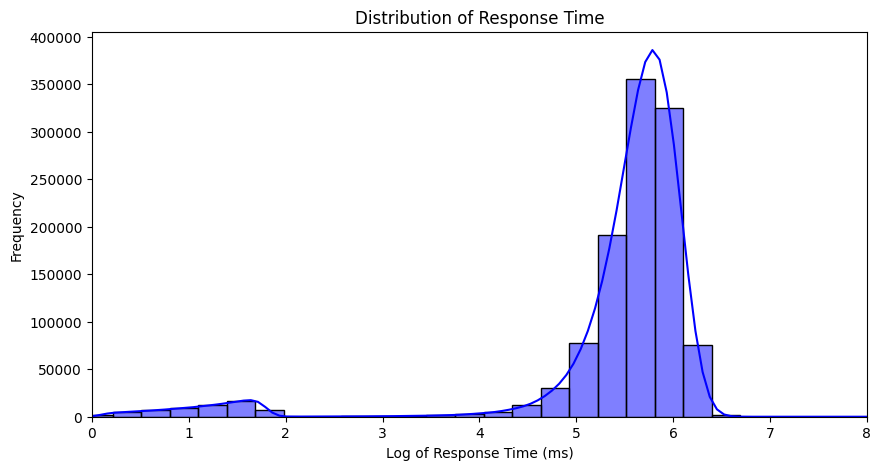

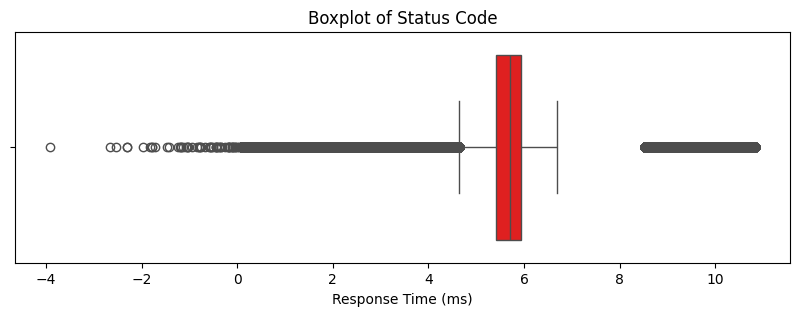

In [16]:
# Plot distribution of Response Times

log_response_time = np.log1p(data["Response Time (ms)"]) #log(1+x)

plt.figure(figsize=(10, 5))
sns.histplot(log_response_time, bins=50, kde=True, color="blue")
plt.xlim(0, 8)
plt.title("Distribution of Response Time")
plt.xlabel("Log of Response Time (ms)")
plt.ylabel("Frequency")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 3))
sns.boxplot(x=log_response_time, color="red")
plt.title(f"Boxplot of {col}")
plt.show()


<Axes: title={'center': 'Top 10 Countries by Requests'}, xlabel='Country'>

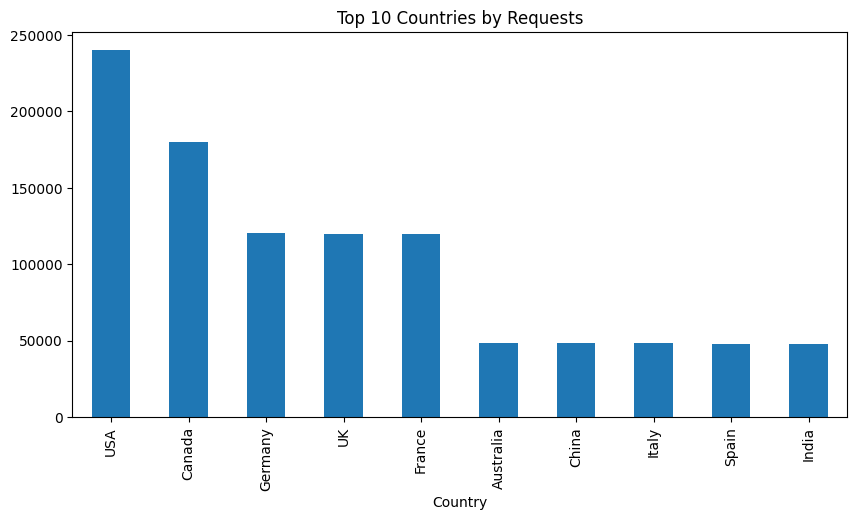

In [17]:
# Top 10 countries by requests
data["Country"].value_counts().head(10).plot(kind="bar", figsize=(10, 5), title="Top 10 Countries by Requests")

<Axes: title={'center': 'Status Code Distribution'}, xlabel='Status Code'>

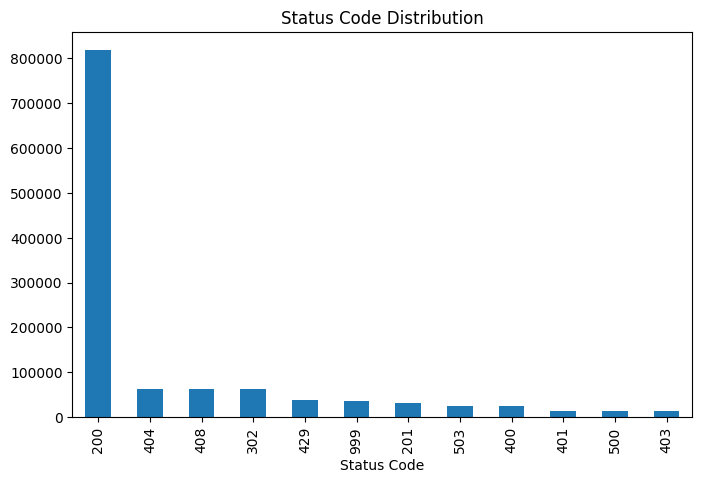

In [18]:
# Distribution of status codes
data["Status Code"].value_counts().plot(kind="bar", figsize=(8, 5), title="Status Code Distribution")

**Deep dive into Purchases**

C:\Users\bida21-044\AppData\Local\Temp\ipykernel_17720\739102102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status Code", y="Response Time (ms)", data=data, palette="Set2")


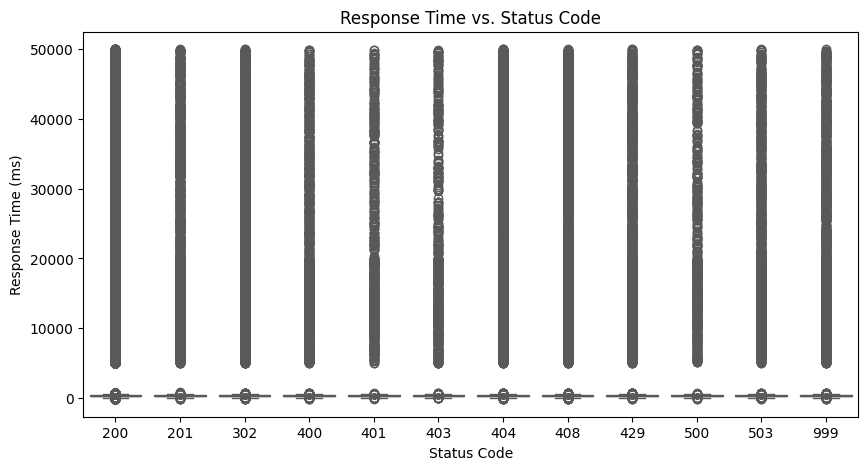

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Status Code", y="Response Time (ms)", data=data, palette="Set2")
plt.title("Response Time vs. Status Code")
plt.xlabel("Status Code")
plt.ylabel("Response Time (ms)")
plt.show()

C:\Users\bida21-044\AppData\Local\Temp\ipykernel_17720\2165471380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=url_counts.index, y=url_counts.values, palette="Blues")


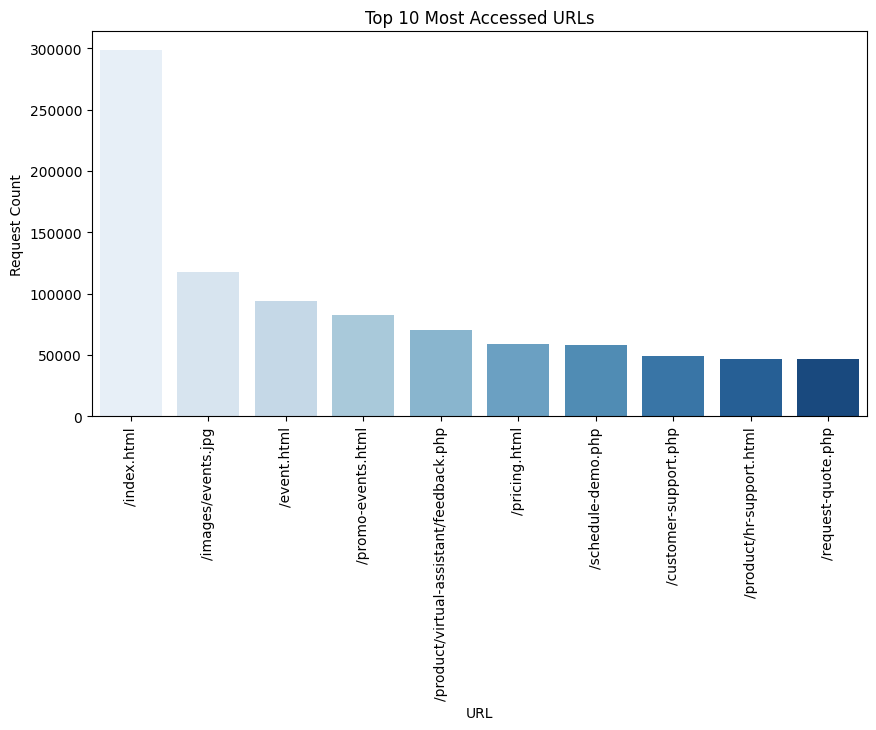

In [21]:
url_counts = data["URL"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=url_counts.index, y=url_counts.values, palette="Blues")
plt.title("Top 10 Most Accessed URLs")
plt.xlabel("URL")
plt.ylabel("Request Count")
plt.xticks(rotation=90)
plt.show()


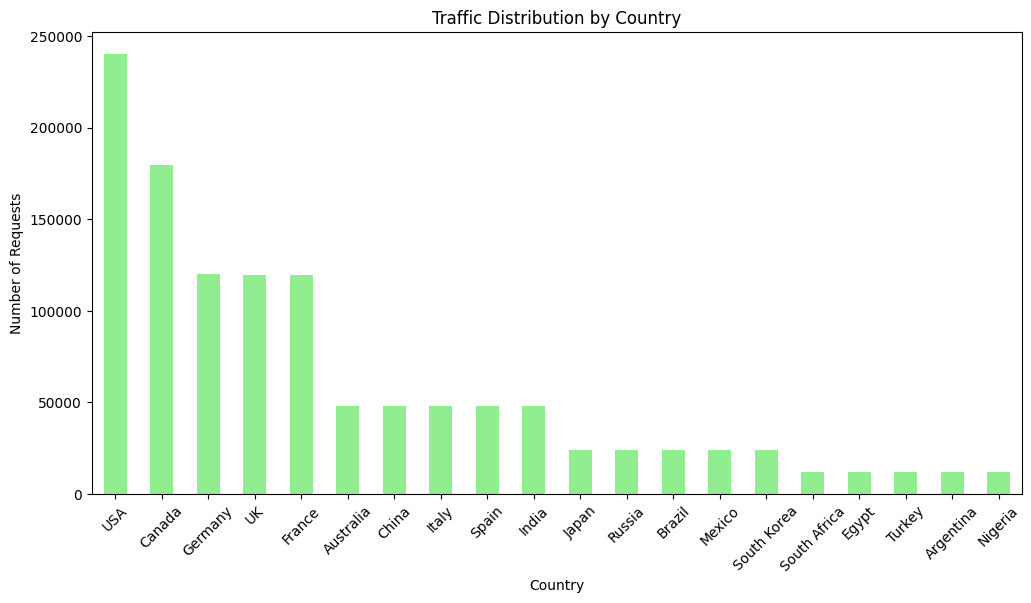

In [22]:
# Traffic by Country
plt.figure(figsize=(12, 6))
data['Country'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Traffic Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()


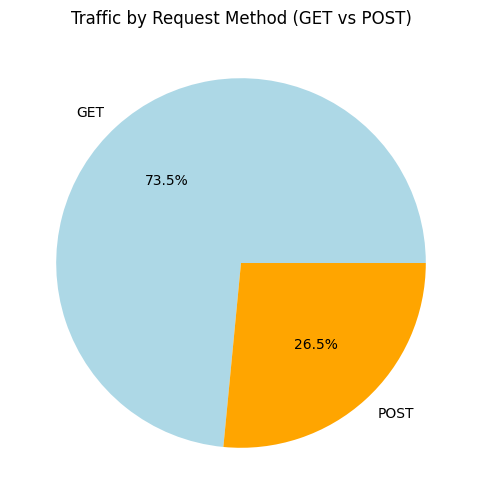

In [23]:
# Traffic by Method
plt.figure(figsize=(10,6))
data['Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Traffic by Request Method (GET vs POST)')
plt.ylabel('')
plt.show()

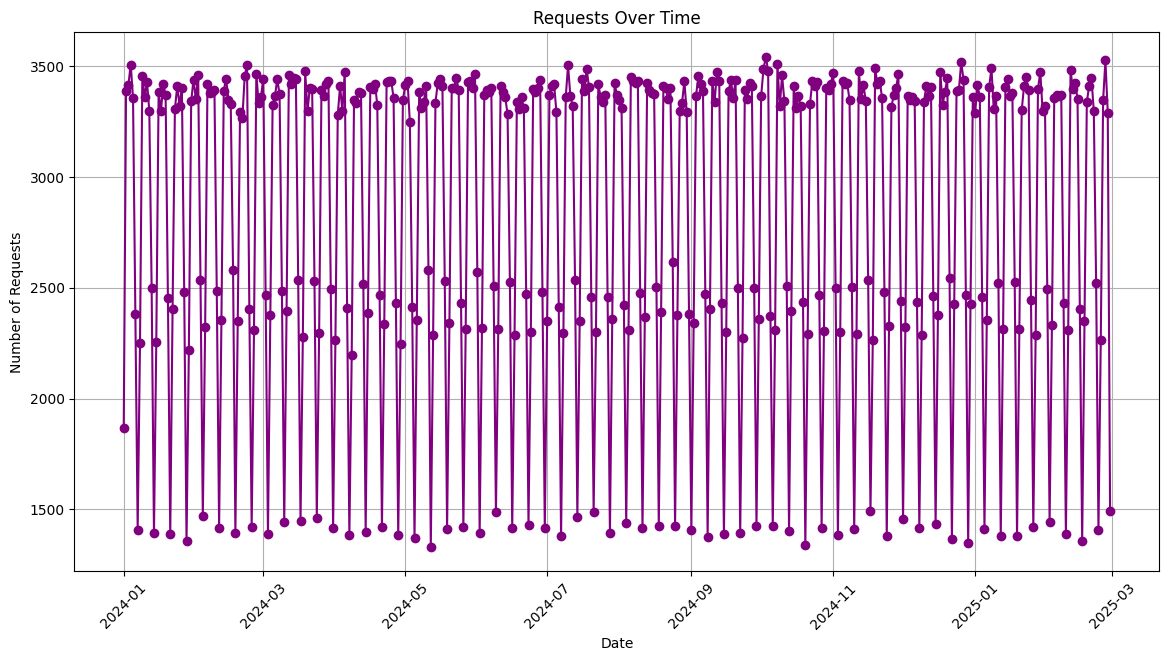

In [24]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Group by date or hour and count the requests
data['Date'] = data['Timestamp'].dt.date  # Use .dt.hour if you want an hourly plot
requests_by_date = data.groupby('Date').size()

# Plotting the time series
plt.figure(figsize=(14,7))
requests_by_date.plot(kind='line', marker='o', color='purple')
plt.title('Requests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()